In [21]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Original image data
original_image = np.array([
    [3, 5, 4, 3, 4, 1],
    [6, 1, 1, 7, 4, 3],
    [6, 4, 5, 4, 5, 3],
    [2, 3, 2, 5, 4, 7],
    [5, 2, 1, 2, 6, 3],
    [6, 5, 2, 1, 3, 7]
])

# Display settings
def display_results(original, processed, title, operation_name):
    fig, axes = plt.subplots(2, 2, figsize=(12, 10))

    # Original image
    axes[0,0].imshow(original, cmap='gray', vmin=0, vmax=7)
    axes[0,0].set_title('Original Image')
    axes[0,0].axis('off')

    # Processed image
    axes[0,1].imshow(processed, cmap='gray', vmin=0, vmax=7)
    axes[0,1].set_title(f'{title} Image')
    axes[0,1].axis('off')

    # Original histogram
    axes[1,0].hist(original.flatten(), bins=np.arange(-0.5, 8, 1), edgecolor='black')
    axes[1,0].set_title('Original Histogram')
    axes[1,0].set_xlabel('Pixel Value')
    axes[1,0].set_ylabel('Frequency')

    # Processed histogram
    axes[1,1].hist(processed.flatten(), bins=np.arange(-0.5, 8, 1), edgecolor='black')
    axes[1,1].set_title(f'{operation_name} Histogram')
    axes[1,1].set_xlabel('Pixel Value')

    plt.tight_layout()
    plt.show()













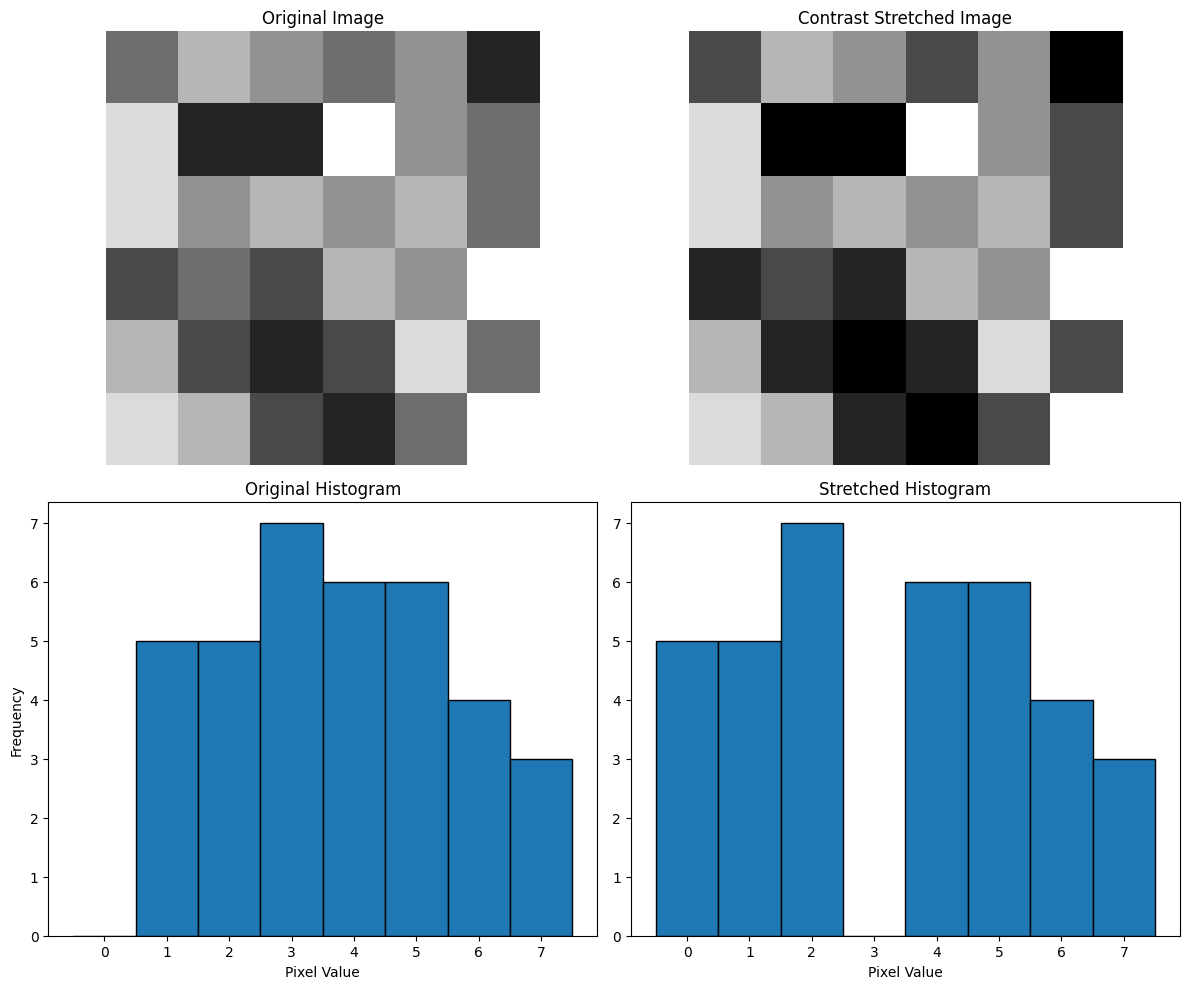

In [22]:

# a) Contrast Stretching
def contrast_stretching(image):
    min_val, max_val = np.min(image), np.max(image)
    if min_val == max_val:
        return image
    stretched = ((image - min_val) / (max_val - min_val)) * 7
    return np.round(stretched).astype(int)

stretched_img = contrast_stretching(original_image)
display_results(original_image, stretched_img, 'Contrast Stretched', 'Stretched')








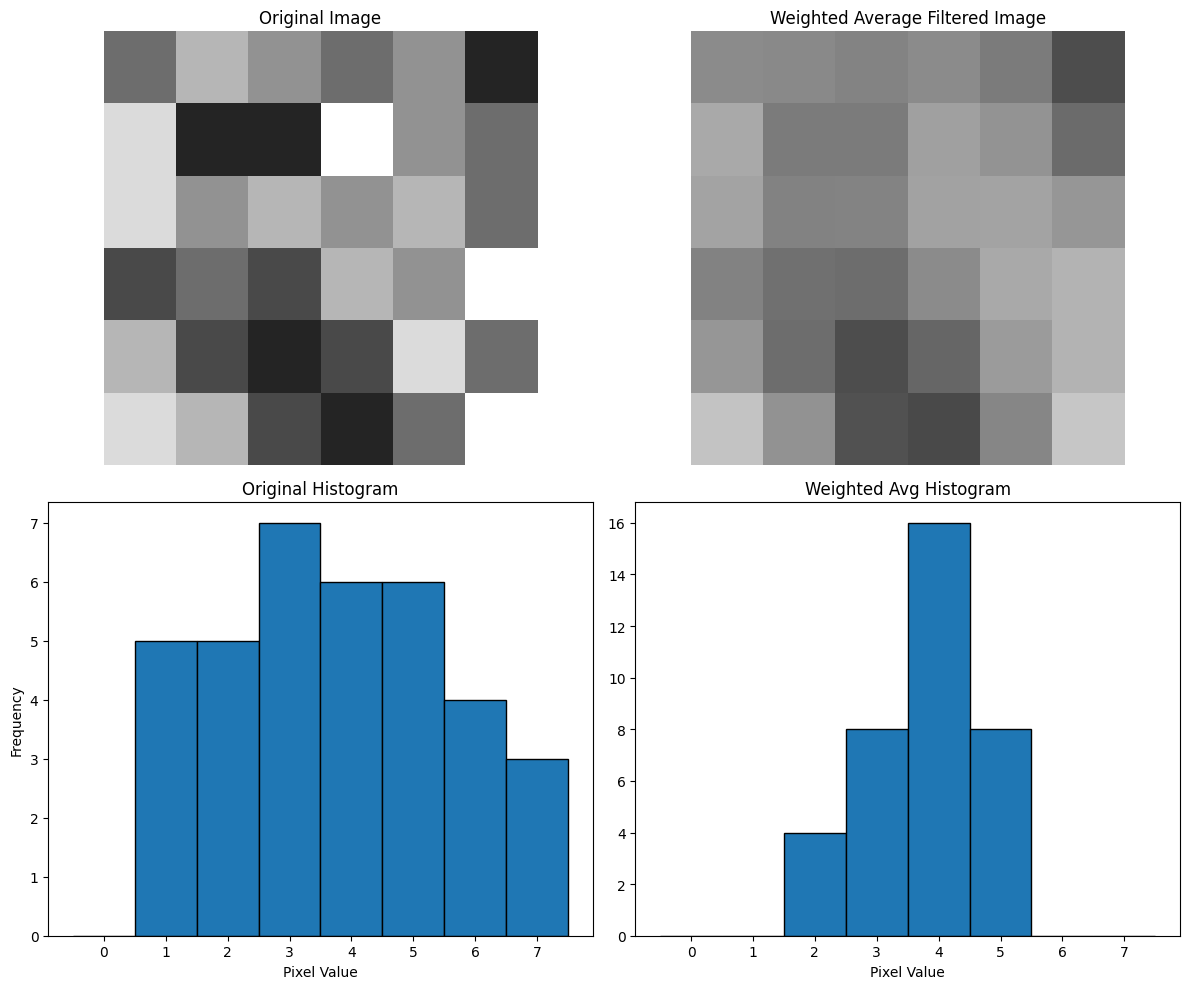

In [23]:

# b) Weighted Average Filter
weights = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
weighted_avg_img = ndimage.convolve(original_image.astype(float), weights, mode='reflect')
display_results(original_image, weighted_avg_img, 'Weighted Average Filtered', 'Weighted Avg')













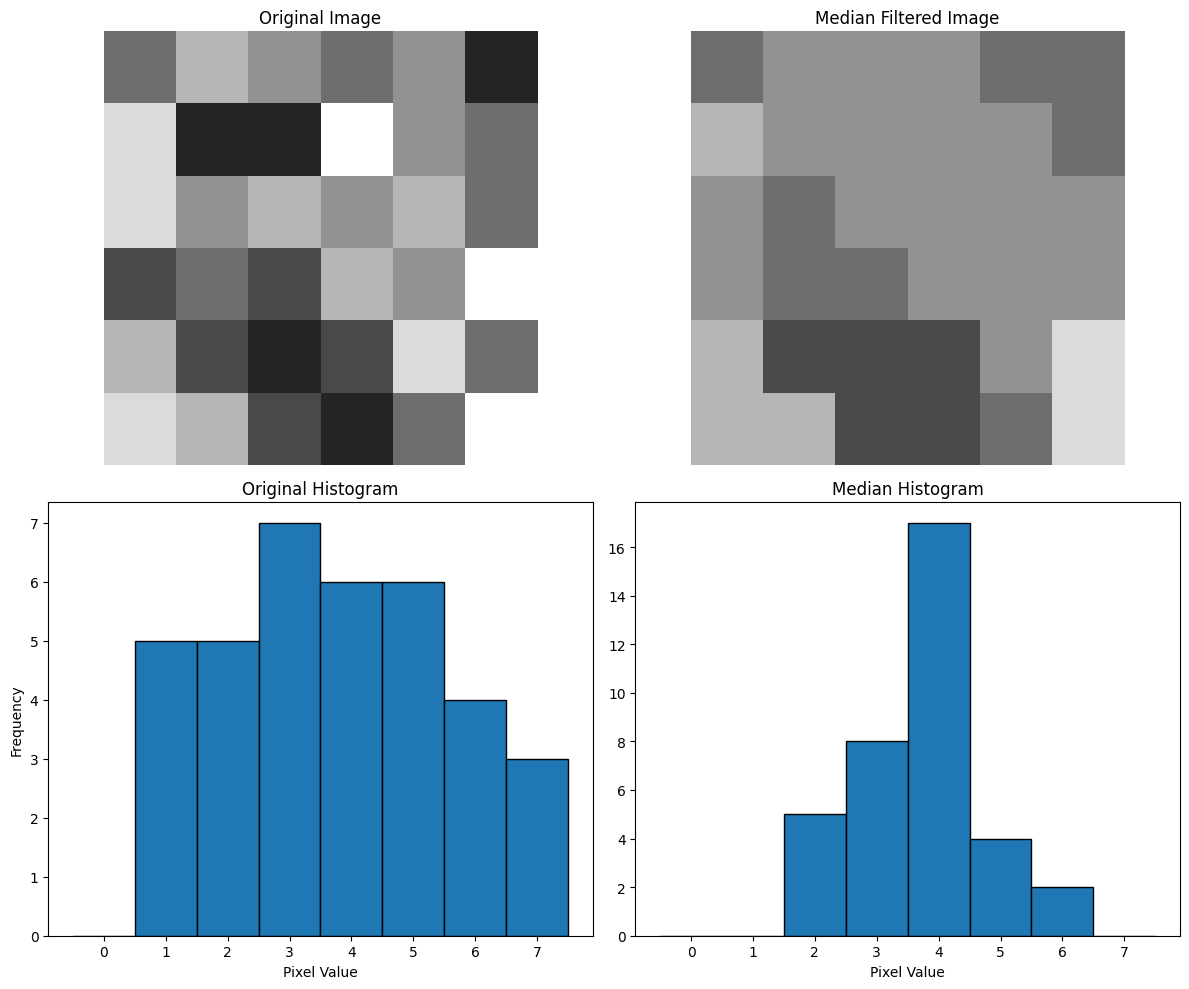

In [24]:

# c) Median Filter
median_img = ndimage.median_filter(original_image, size=3)
display_results(original_image, median_img, 'Median Filtered', 'Median')












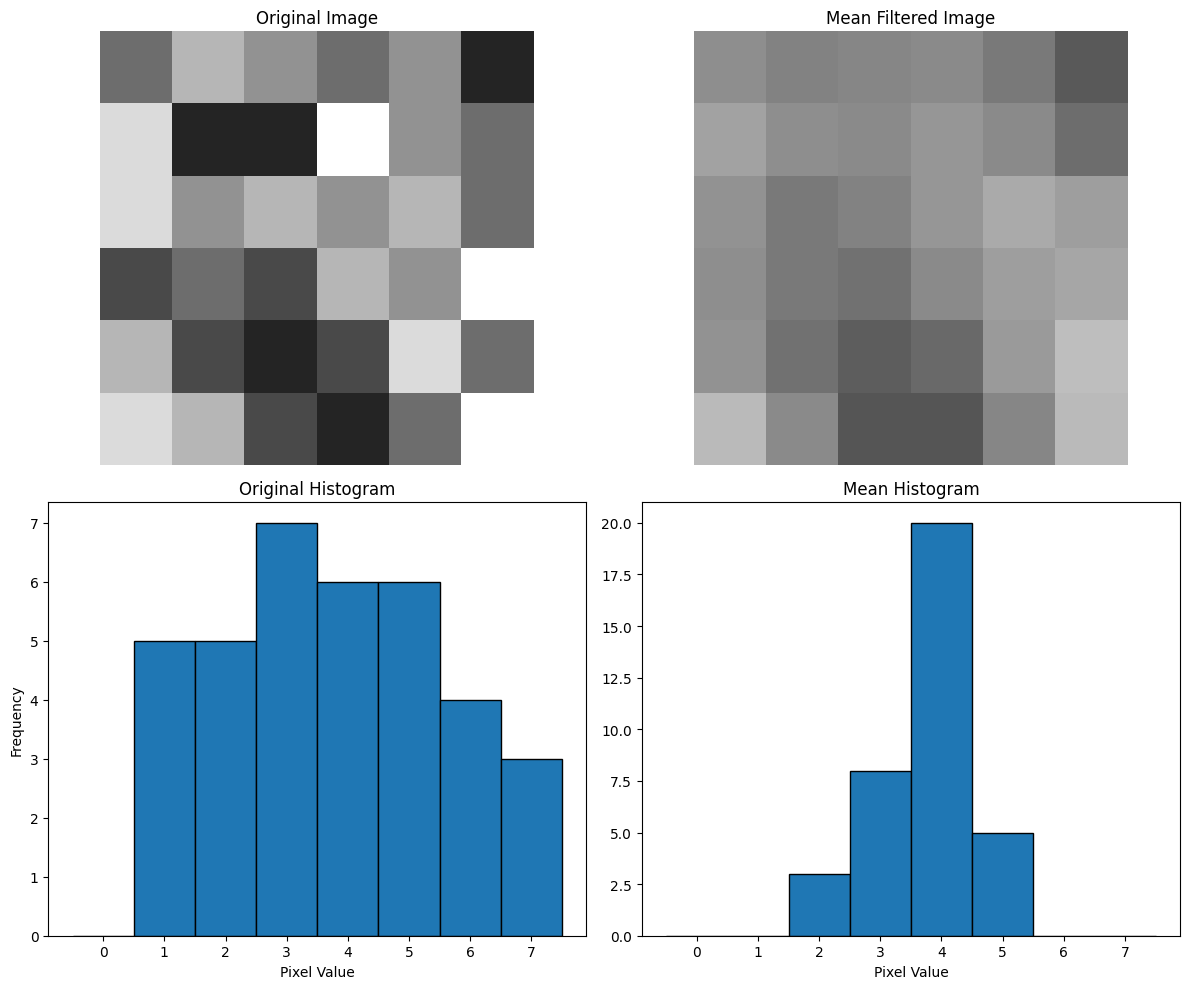

In [25]:

# d) Mean Filter
mean_img = ndimage.uniform_filter(original_image.astype(float), size=3)
display_results(original_image, mean_img, 'Mean Filtered', 'Mean')













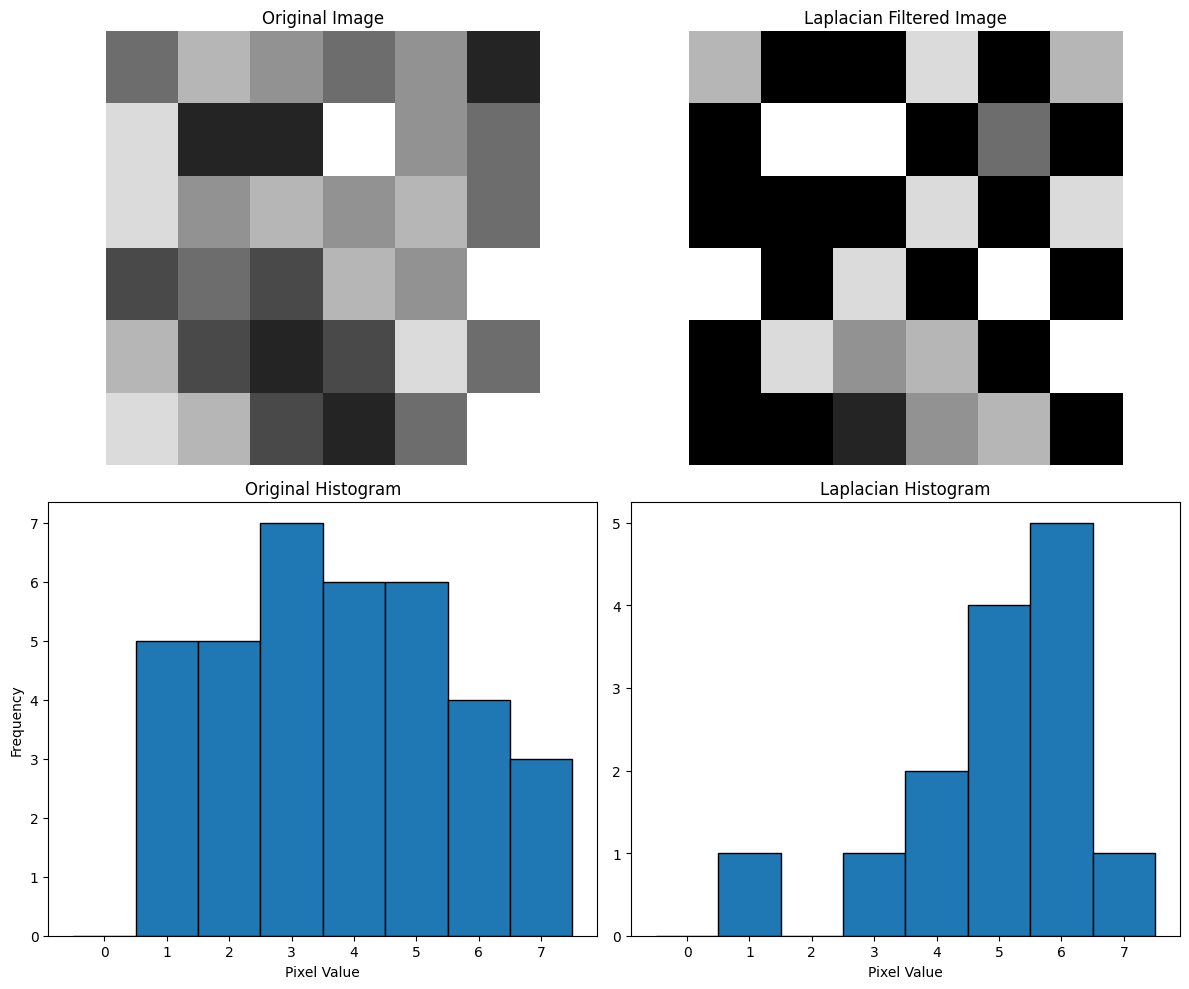

In [26]:

# e) Laplacian Filter
laplacian_kernel = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_img = ndimage.convolve(original_image.astype(float), laplacian_kernel)
display_results(original_image, laplacian_img, 'Laplacian Filtered', 'Laplacian')














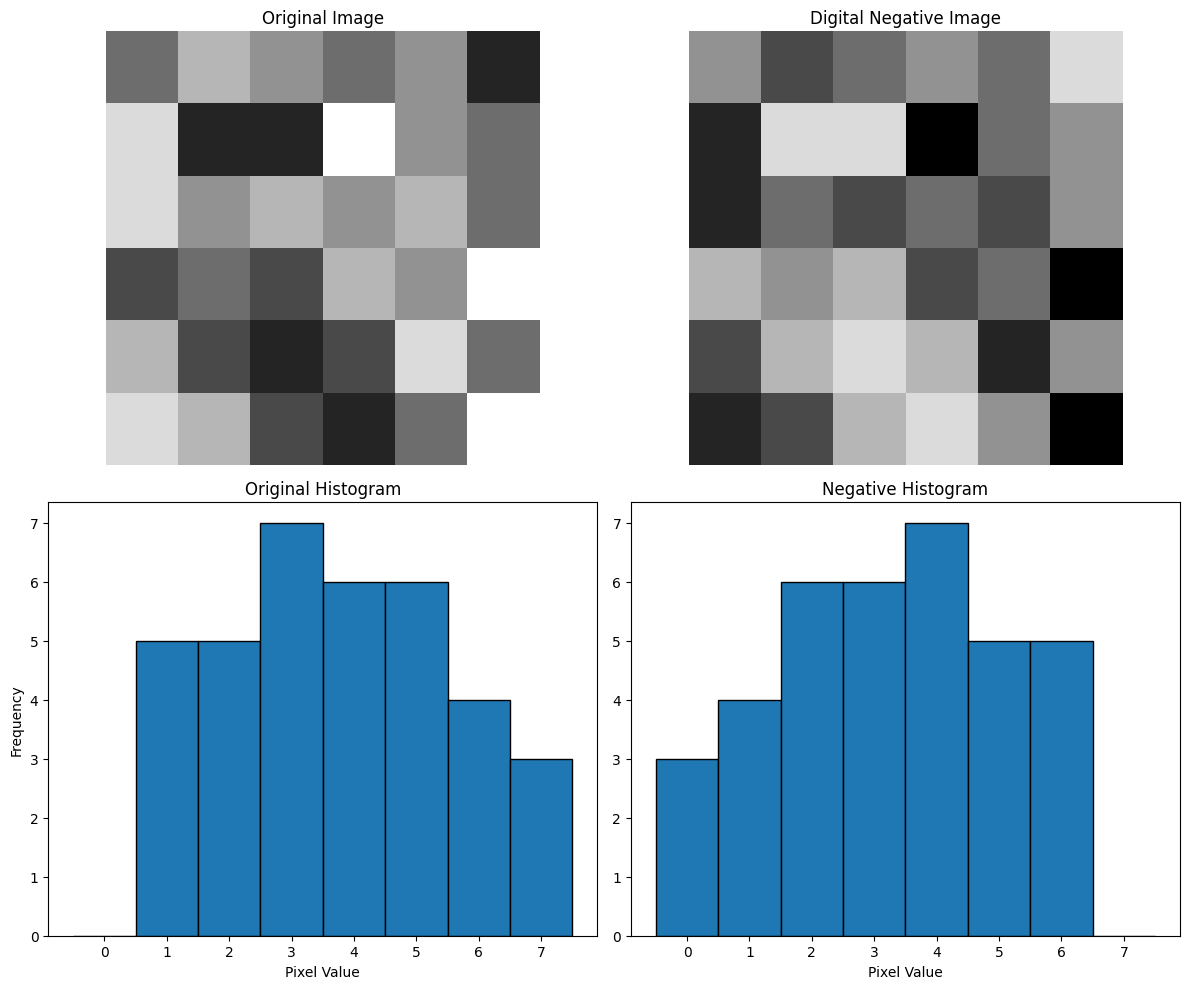

In [27]:

# f) Digital Negative
negative_img = 7 - original_image
display_results(original_image, negative_img, 'Digital Negative', 'Negative')











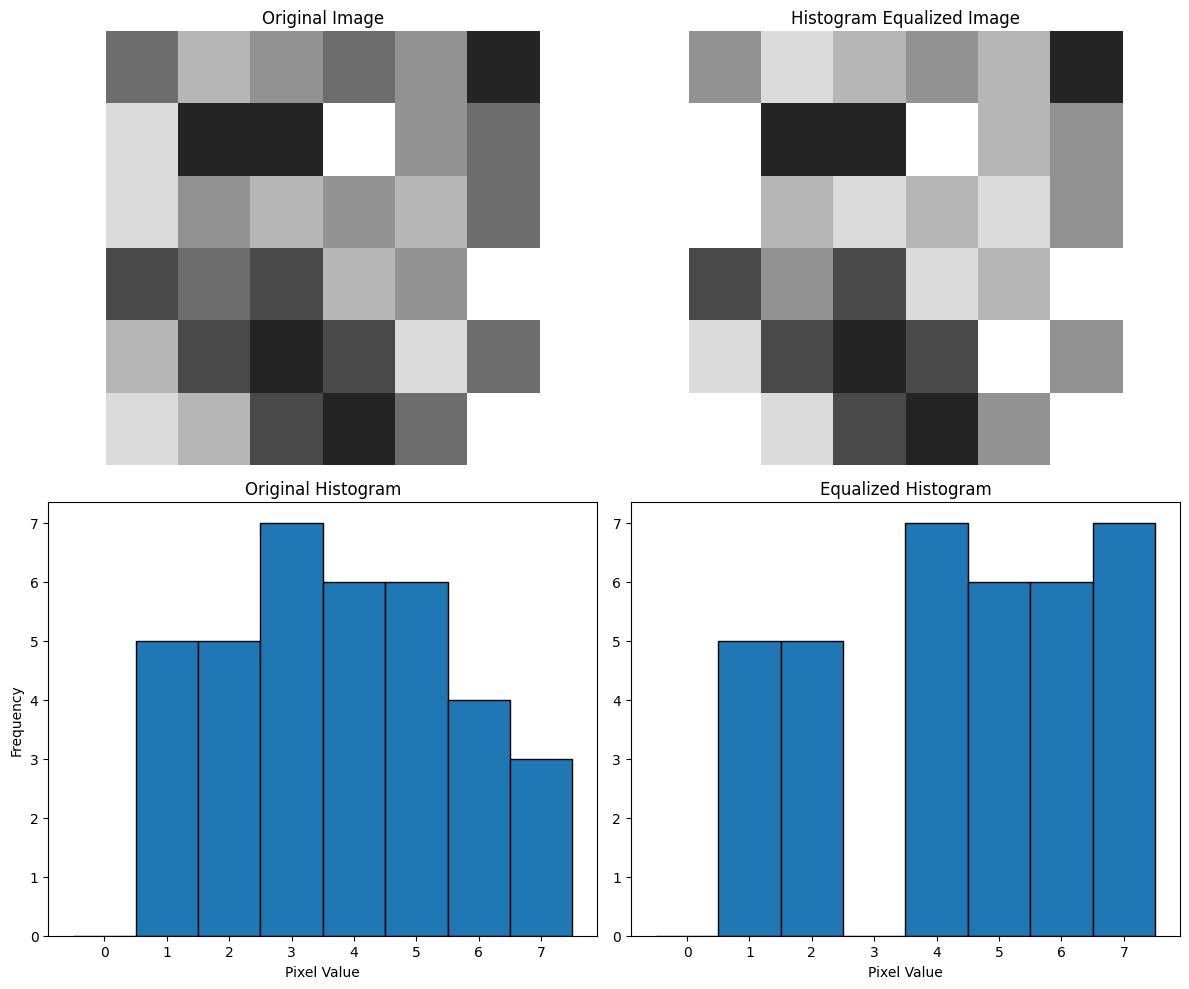


Specific Operations at pixel (3,3):
Original value: 5
Neighborhood:
[[1 1 7]
 [4 5 4]
 [3 2 5]]

Weighted Average: 3.62
Median: 4.0
Mean: 3.56
Laplacian: -9


In [28]:

# g) Histogram Equalization
def histogram_equalization(image):
    hist, bins = np.histogram(image.flatten(), bins=8, range=(0,7))
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * 7 / (cdf.max() - cdf.min())
    equalized = np.interp(image.flatten(), bins[:-1], cdf_normalized)
    return np.round(equalized).reshape(image.shape).astype(int)

equalized_img = histogram_equalization(original_image)
display_results(original_image, equalized_img, 'Histogram Equalized', 'Equalized')

# Print specific pixel operations for (3,3)
row, col = 2, 2  # (3,3) in 1-based indexing
neighborhood = original_image[row-1:row+2, col-1:col+2]

print("\nSpecific Operations at pixel (3,3):")
print(f"Original value: {original_image[row,col]}")
print(f"Neighborhood:\n{neighborhood}")

# Weighted average
print(f"\nWeighted Average: {np.sum(neighborhood * weights):.2f}")

# Median
print(f"Median: {np.median(neighborhood)}")

# Mean
print(f"Mean: {np.mean(neighborhood):.2f}")

# Laplacian
print(f"Laplacian: {np.sum(neighborhood * laplacian_kernel)}")
















---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



# **METHOD 2**

In [29]:
#Setup (Common for all solutions)




import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize

# Original image data
original_image = np.array([
    [3, 5, 4, 3, 4, 1],
    [6, 1, 1, 7, 4, 3],
    [6, 4, 5, 4, 5, 3],
    [2, 3, 2, 5, 4, 7],
    [5, 2, 1, 2, 6, 3],
    [6, 5, 2, 1, 3, 7]
])

# Display settings
cmap = 'gray'
vmin, vmax = 0, 7

def display_image(image, title):
    plt.figure(figsize=(3, 3))
    plt.imshow(image, cmap=cmap, vmin=vmin, vmax=vmax)
    plt.title(title)
    plt.colorbar()
    plt.show()

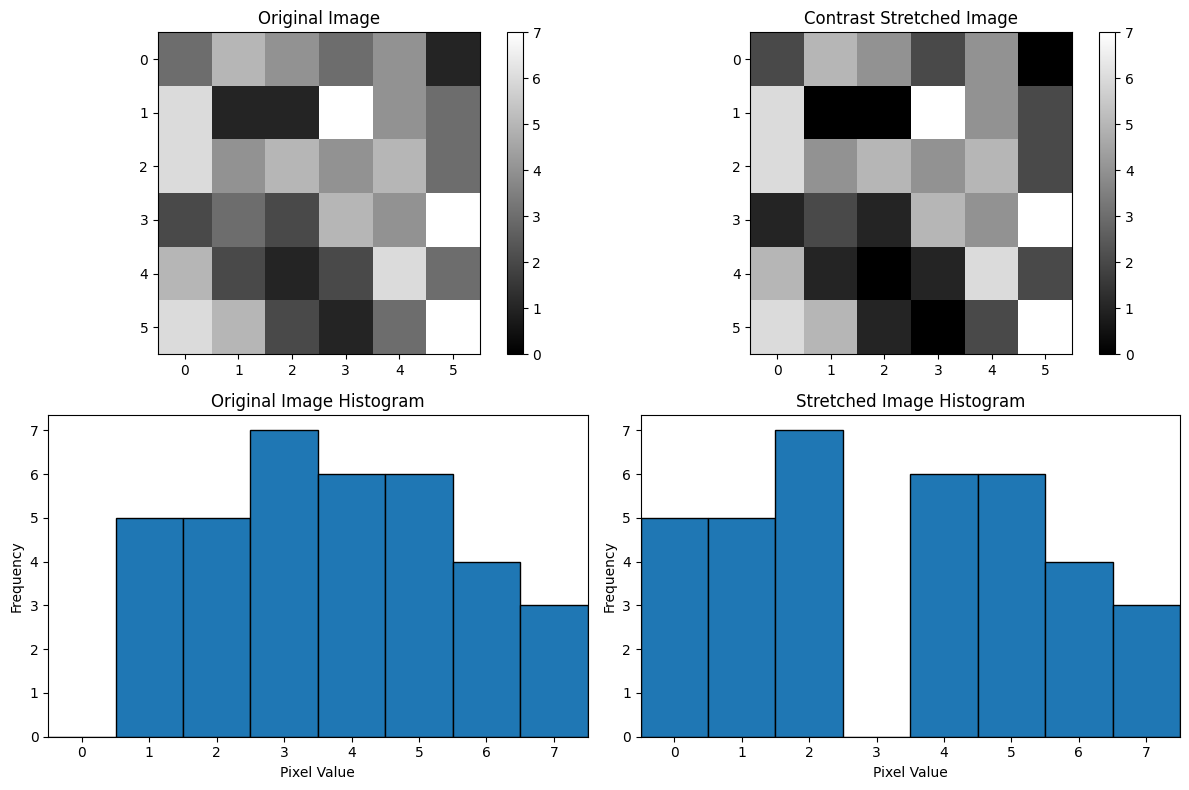

Contrast Stretching Transformation:
Original range: 1 to 7
Stretched range: 0 to 7

Pixel Value Mapping:
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 5
6 -> 6
7 -> 7


In [30]:
#a) Contrast Stretching







def contrast_stretching(image, bit_depth=3):
    max_val = 2**bit_depth - 1  # 7 for 3-bit

    # Handle case where all pixels are same value
    if np.min(image) == np.max(image):
        return image

    stretched = ((image - np.min(image)) / (np.max(image) - np.min(image))) * max_val
    return np.round(stretched).astype(int)

# Apply contrast stretching
stretched_image = contrast_stretching(original_image)

# Create figure with subplots
plt.figure(figsize=(12, 8))

# Display original image
plt.subplot(2, 2, 1)
plt.imshow(original_image, cmap='gray', vmin=0, vmax=7)
plt.title('Original Image')
plt.colorbar()

# Display stretched image
plt.subplot(2, 2, 2)
plt.imshow(stretched_image, cmap='gray', vmin=0, vmax=7)
plt.title('Contrast Stretched Image')
plt.colorbar()

# Original image histogram
plt.subplot(2, 2, 3)
plt.hist(original_image.flatten(), bins=np.arange(-0.5, 8, 1), edgecolor='black')
plt.title('Original Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xticks(range(8))
plt.xlim(-0.5, 7.5)

# Stretched image histogram
plt.subplot(2, 2, 4)
plt.hist(stretched_image.flatten(), bins=np.arange(-0.5, 8, 1), edgecolor='black')
plt.title('Stretched Image Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')
plt.xticks(range(8))
plt.xlim(-0.5, 7.5)

plt.tight_layout()
plt.show()

# Print transformation details
print("Contrast Stretching Transformation:")
print(f"Original range: {np.min(original_image)} to {np.max(original_image)}")
print(f"Stretched range: {np.min(stretched_image)} to {np.max(stretched_image)}")
print("\nPixel Value Mapping:")
unique_vals = np.unique(original_image)
for val in sorted(unique_vals):
    print(f"{val} -> {contrast_stretching(np.array([[val]]))[0,0]}")

Original Image:


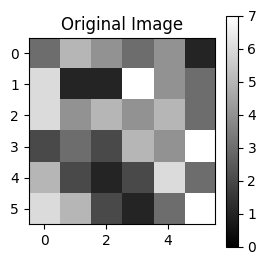


3x3 Neighborhood at (3,3):
[[1 1 7]
 [4 5 4]
 [3 2 5]]

Weighted Average Filter Mask:
[[1. 2. 1.]
 [2. 4. 2.]
 [1. 2. 1.]]

Weighted Average at (3,3): 3.62


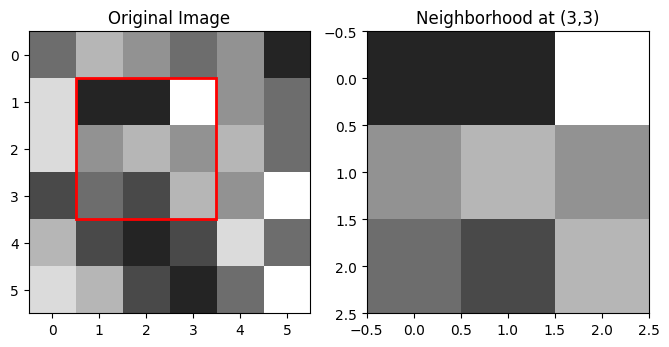

In [31]:
# b) Weighted Average Filter at pixel (3,3)





# Coordinates for pixel (3,3) - Python uses 0-based indexing
row, col = 2, 2

# Extract 3x3 neighborhood
neighborhood = original_image[row-1:row+2, col-1:col+2]

# Weighted average filter mask
weights = np.array([
    [1, 2, 1],
    [2, 4, 2],
    [1, 2, 1]
]) / 16  # Normalization factor

# Apply weighted average
weighted_avg = np.sum(neighborhood * weights)

# Display results
print("Original Image:")
display_image(original_image, "Original Image")

print("\n3x3 Neighborhood at (3,3):")
print(neighborhood)

print("\nWeighted Average Filter Mask:")
print(weights * 16)  # Showing integer weights

print(f"\nWeighted Average at (3,3): {weighted_avg:.2f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(original_image, cmap=cmap, vmin=vmin, vmax=vmax)
ax1.set_title('Original Image')
ax1.add_patch(plt.Rectangle((col-1.5, row-1.5), 3, 3, fill=False, edgecolor='red', linewidth=2))

ax2.imshow(neighborhood, cmap=cmap, vmin=vmin, vmax=vmax)
ax2.set_title('Neighborhood at (3,3)')
plt.show()

Original Image:


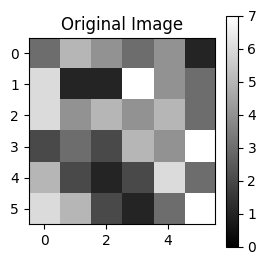


3x3 Neighborhood at (3,3):
[[1 1 7]
 [4 5 4]
 [3 2 5]]

Sorted Pixel Values:
[1 1 2 3 4 4 5 5 7]

Median Value at (3,3): 4.0


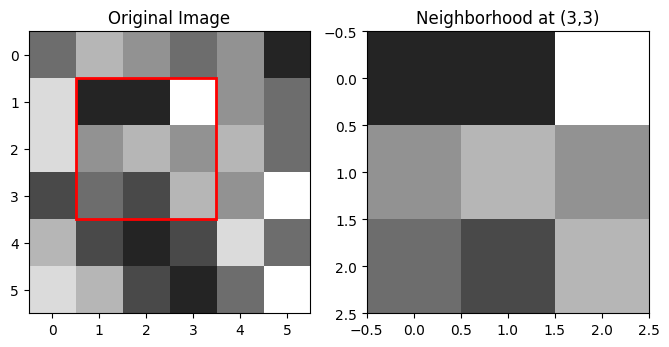

In [6]:
# c) Median Filter at pixel (3,3)





# Coordinates for pixel (3,3)
row, col = 2, 2

# Extract 3x3 neighborhood
neighborhood = original_image[row-1:row+2, col-1:col+2]

# Apply median filter
median_val = np.median(neighborhood)

# Display results
print("Original Image:")
display_image(original_image, "Original Image")

print("\n3x3 Neighborhood at (3,3):")
print(neighborhood)

print("\nSorted Pixel Values:")
print(np.sort(neighborhood.flatten()))

print(f"\nMedian Value at (3,3): {median_val}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(original_image, cmap=cmap, vmin=vmin, vmax=vmax)
ax1.set_title('Original Image')
ax1.add_patch(plt.Rectangle((col-1.5, row-1.5), 3, 3, fill=False, edgecolor='red', linewidth=2))

ax2.imshow(neighborhood, cmap=cmap, vmin=vmin, vmax=vmax)
ax2.set_title('Neighborhood at (3,3)')
plt.show()

Original Image:


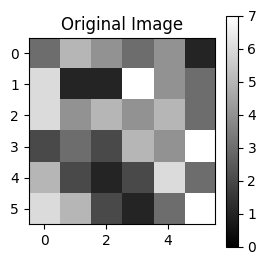


3x3 Neighborhood at (3,3):
[[1 1 7]
 [4 5 4]
 [3 2 5]]

Calculation:
Sum: 32
Count: 9

Mean Value at (3,3): 3.56


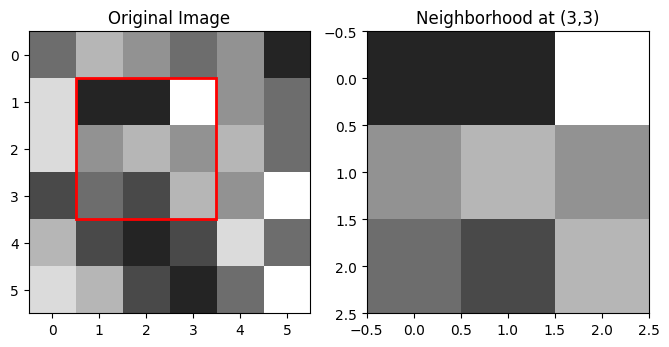

In [7]:
# d) Mean Filter at pixel (3,3)







# Coordinates for pixel (3,3)
row, col = 2, 2

# Extract 3x3 neighborhood
neighborhood = original_image[row-1:row+2, col-1:col+2]

# Apply mean filter
mean_val = np.mean(neighborhood)

# Display results
print("Original Image:")
display_image(original_image, "Original Image")

print("\n3x3 Neighborhood at (3,3):")
print(neighborhood)

print("\nCalculation:")
print(f"Sum: {np.sum(neighborhood)}")
print(f"Count: {neighborhood.size}")

print(f"\nMean Value at (3,3): {mean_val:.2f}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(original_image, cmap=cmap, vmin=vmin, vmax=vmax)
ax1.set_title('Original Image')
ax1.add_patch(plt.Rectangle((col-1.5, row-1.5), 3, 3, fill=False, edgecolor='red', linewidth=2))

ax2.imshow(neighborhood, cmap=cmap, vmin=vmin, vmax=vmax)
ax2.set_title('Neighborhood at (3,3)')
plt.show()

Original Image:


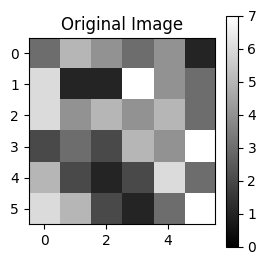


3x3 Neighborhood at (3,3):
[[1 1 7]
 [4 5 4]
 [3 2 5]]

Laplacian Filter Mask:
[[ 0  1  0]
 [ 1 -4  1]
 [ 0  1  0]]

Calculation:
Element-wise multiplication:
[[  0   1   0]
 [  4 -20   4]
 [  0   2   0]]
Sum: -9

Laplacian Filtered Value at (3,3): -9


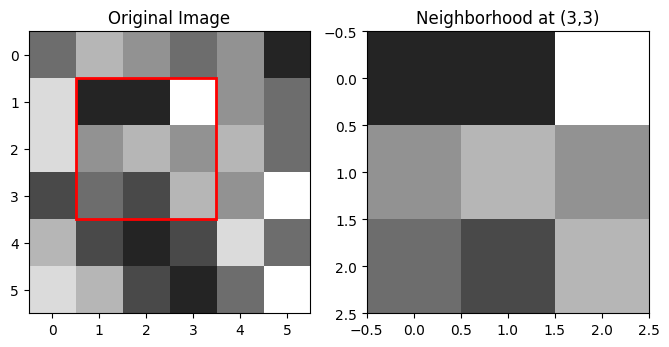

In [8]:
#     e) Composite Laplacian Filter at pixel (3,3)






# Coordinates for pixel (3,3)
row, col = 2, 2

# Extract 3x3 neighborhood
neighborhood = original_image[row-1:row+2, col-1:col+2]

# Laplacian filter mask
laplacian_mask = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])

# Apply Laplacian filter
laplacian_value = np.sum(neighborhood * laplacian_mask)

# Display results
print("Original Image:")
display_image(original_image, "Original Image")

print("\n3x3 Neighborhood at (3,3):")
print(neighborhood)

print("\nLaplacian Filter Mask:")
print(laplacian_mask)

print("\nCalculation:")
print("Element-wise multiplication:")
print(neighborhood * laplacian_mask)
print(f"Sum: {laplacian_value}")

print(f"\nLaplacian Filtered Value at (3,3): {laplacian_value}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(original_image, cmap=cmap, vmin=vmin, vmax=vmax)
ax1.set_title('Original Image')
ax1.add_patch(plt.Rectangle((col-1.5, row-1.5), 3, 3, fill=False, edgecolor='red', linewidth=2))

ax2.imshow(neighborhood, cmap=cmap, vmin=vmin, vmax=vmax)
ax2.set_title('Neighborhood at (3,3)')
plt.show()

Original Image:


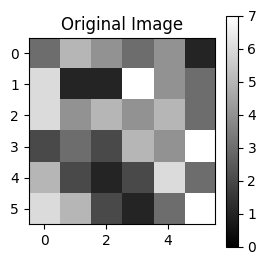


Digital Negative Image:


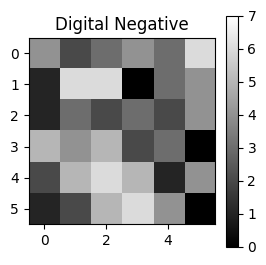


Pixel Value Mapping:
Original -> Negative
0 -> 7
1 -> 6
2 -> 5
3 -> 4
4 -> 3
5 -> 2
6 -> 1
7 -> 0


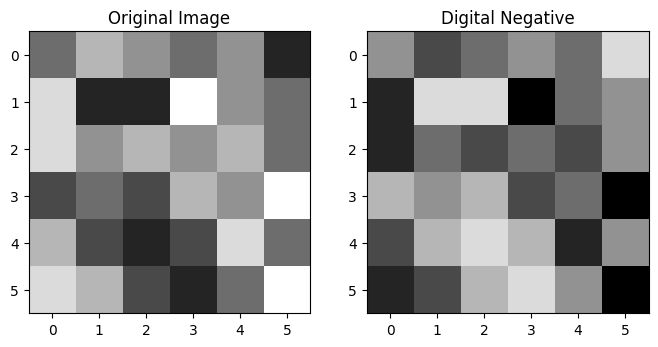

In [9]:
#      f) Digital Negative of the Image








# Calculate digital negative
digital_negative = 7 - original_image  # 7 is max for 3-bit image

# Display results
print("Original Image:")
display_image(original_image, "Original Image")

print("\nDigital Negative Image:")
display_image(digital_negative, "Digital Negative")

print("\nPixel Value Mapping:")
print("Original -> Negative")
for i in range(8):
    print(f"{i} -> {7-i}")

# Side-by-side comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4))
ax1.imshow(original_image, cmap=cmap, vmin=vmin, vmax=vmax)
ax1.set_title('Original Image')

ax2.imshow(digital_negative, cmap=cmap, vmin=vmin, vmax=vmax)
ax2.set_title('Digital Negative')
plt.show()

Original Image:


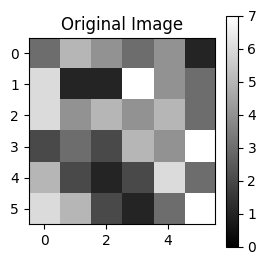


Histogram Equalized Image:


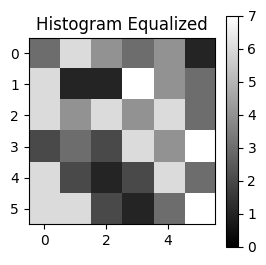

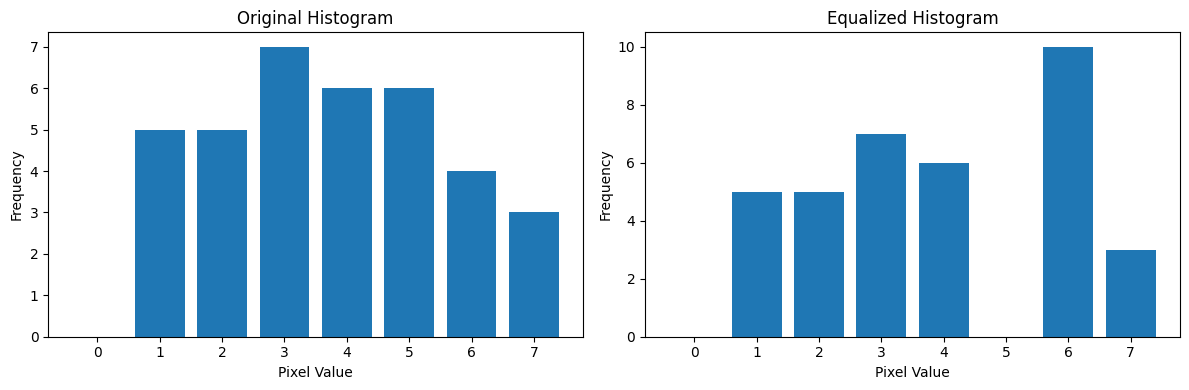


Pixel Value Mapping:
Original -> Equalized
0 -> 0
1 -> 1
2 -> 2
3 -> 3
4 -> 4
5 -> 6
6 -> 6
7 -> 7


In [10]:
#      g) Histogram Equalization






def histogram_equalization(image, bit_depth=3):
    max_val = 2**bit_depth - 1
    hist, bins = np.histogram(image.flatten(), bins=max_val+1, range=(0, max_val))
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * max_val / (cdf.max() - cdf.min())
    cdf_normalized = np.round(cdf_normalized).astype(int)

    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized_image[i,j] = cdf_normalized[image[i,j]]

    return equalized_image, hist, cdf_normalized

# Apply histogram equalization
equalized_image, hist, cdf = histogram_equalization(original_image)

# Display results
print("Original Image:")
display_image(original_image, "Original Image")

print("\nHistogram Equalized Image:")
display_image(equalized_image, "Histogram Equalized")

# Plot histograms
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.bar(range(8), hist)
plt.title('Original Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.bar(range(8), np.histogram(equalized_image.flatten(), bins=8, range=(0,7))[0])
plt.title('Equalized Histogram')
plt.xlabel('Pixel Value')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# Print mapping table
print("\nPixel Value Mapping:")
print("Original -> Equalized")
for i in range(8):
    print(f"{i} -> {cdf[i]}")



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



---



# **ALL IN ONE**

Original Image with Histogram:


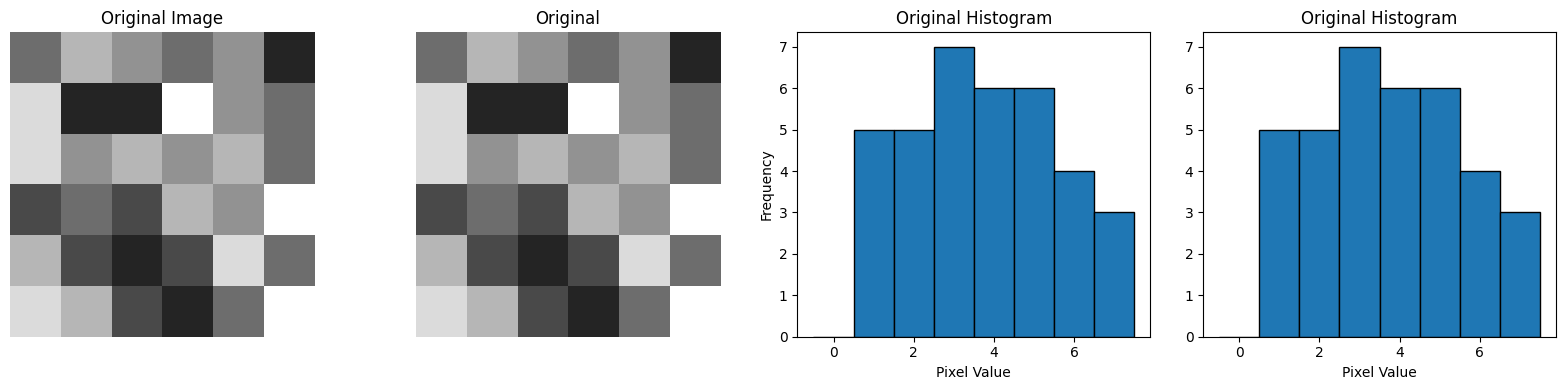


Contrast Stretching Results:


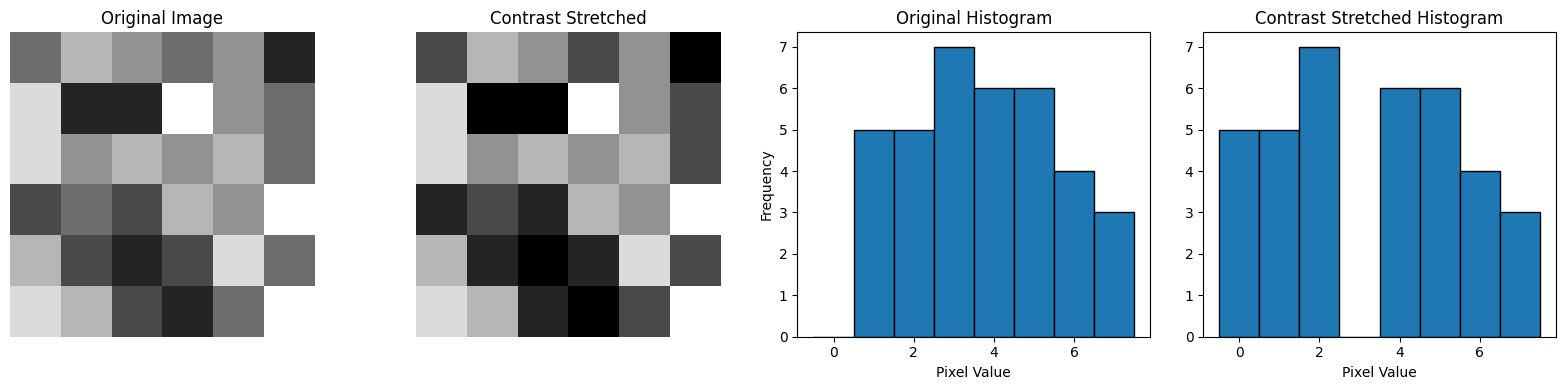


Weighted Average Filter Results:


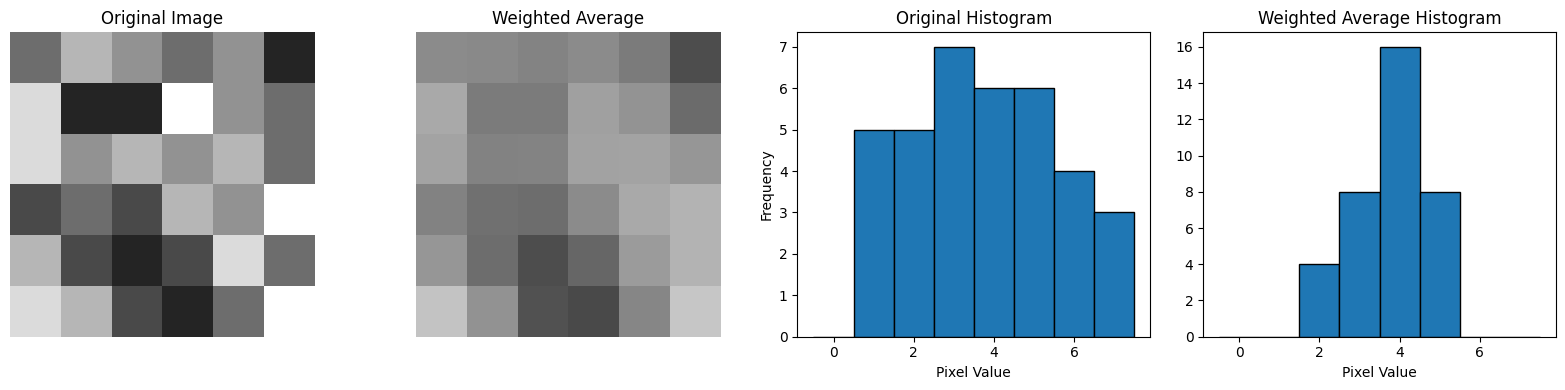


Median Filter Results:


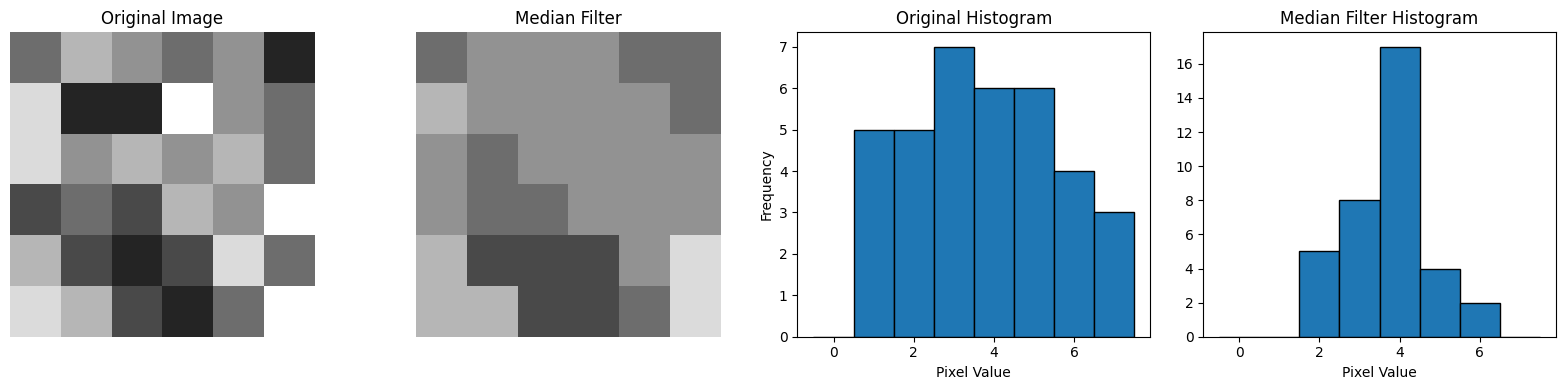


Mean Filter Results:


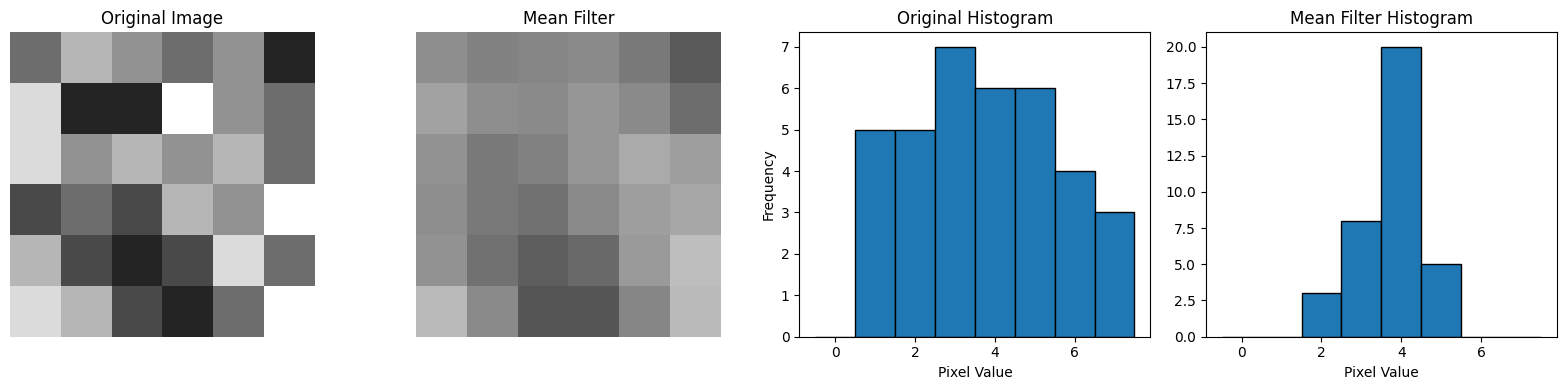


Laplacian Filter Results:


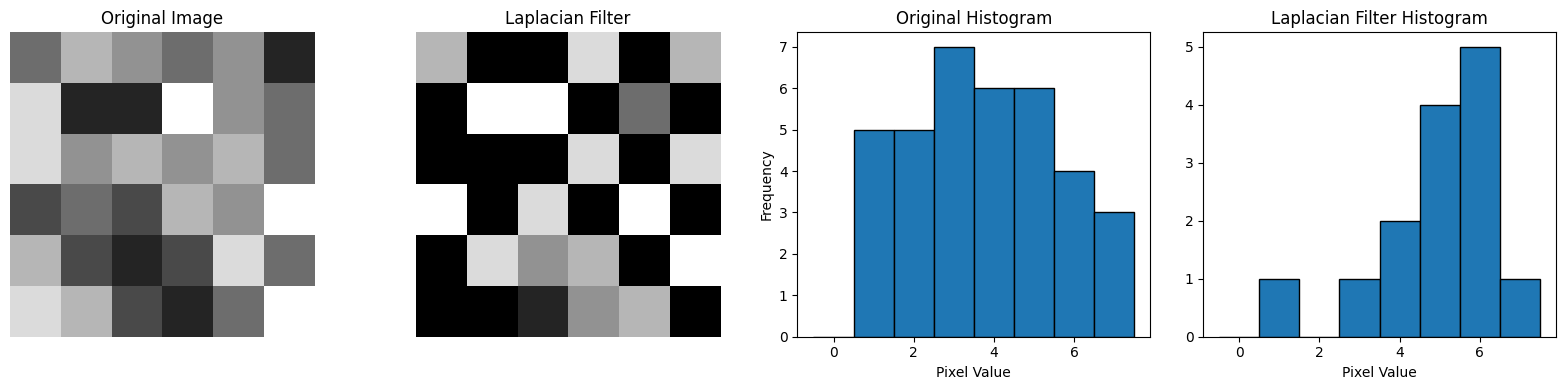


Digital Negative Results:


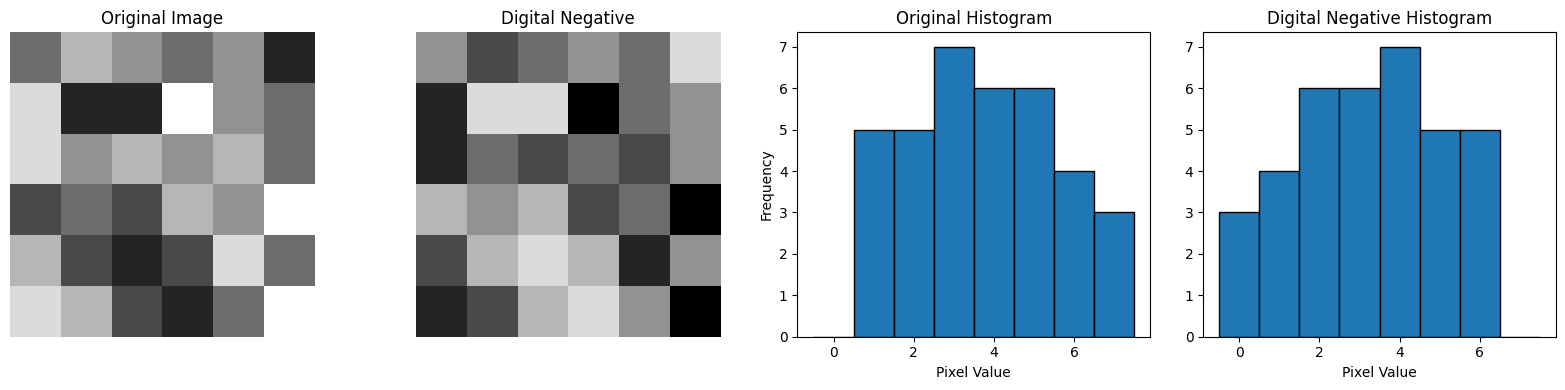


Histogram Equalization Results:


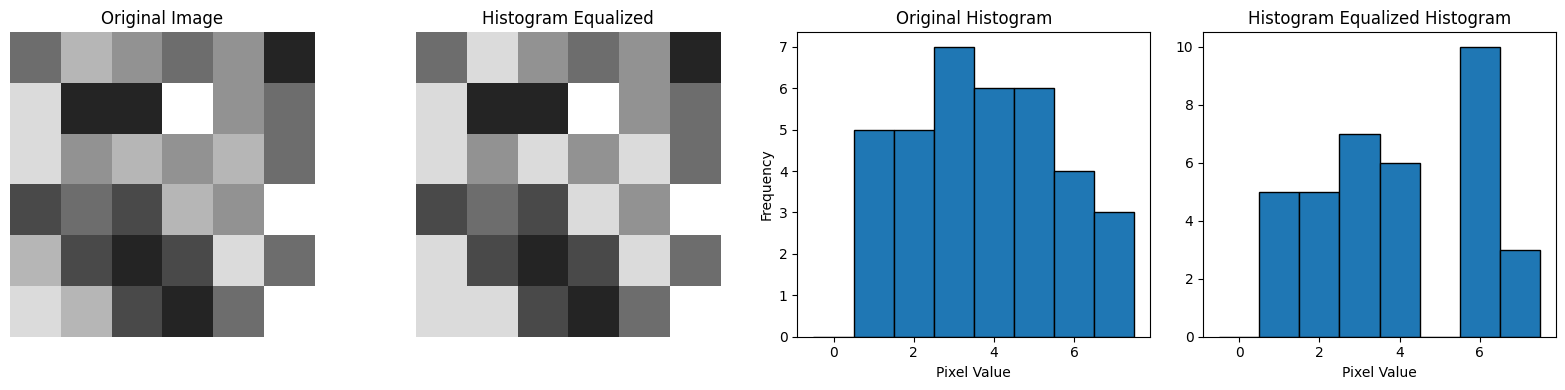


Specific Operations at pixel (3,3):
Original value: 5
Neighborhood:
[[1 1 7]
 [4 5 4]
 [3 2 5]]
Weighted Average: 3.62
Median: 4.0
Mean: 3.56
Laplacian: -9


In [32]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage

# Original image data
original_image = np.array([
    [3, 5, 4, 3, 4, 1],
    [6, 1, 1, 7, 4, 3],
    [6, 4, 5, 4, 5, 3],
    [2, 3, 2, 5, 4, 7],
    [5, 2, 1, 2, 6, 3],
    [6, 5, 2, 1, 3, 7]
])

# Display settings
cmap = 'gray'
vmin, vmax = 0, 7

def display_comparison(original, processed, title):
    """Display image and histogram comparison"""
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4, figsize=(16, 4))

    # Original image
    ax1.imshow(original, cmap=cmap, vmin=vmin, vmax=vmax)
    ax1.set_title('Original Image')
    ax1.axis('off')

    # Processed image
    ax2.imshow(processed, cmap=cmap, vmin=vmin, vmax=vmax)
    ax2.set_title(title)
    ax2.axis('off')

    # Original histogram
    ax3.hist(original.flatten(), bins=np.arange(-0.5, 8, 1), edgecolor='black')
    ax3.set_title('Original Histogram')
    ax3.set_xlabel('Pixel Value')
    ax3.set_ylabel('Frequency')

    # Processed histogram
    ax4.hist(processed.flatten(), bins=np.arange(-0.5, 8, 1), edgecolor='black')
    ax4.set_title(f'{title} Histogram')
    ax4.set_xlabel('Pixel Value')

    plt.tight_layout()
    plt.show()

# Display original image with histogram
print("Original Image with Histogram:")
display_comparison(original_image, original_image, "Original")

# 1. Contrast Stretching
def contrast_stretching(image, bit_depth=3):
    max_val = 2**bit_depth - 1
    min_val = 0

    # Handle case where all pixels are same value
    if np.min(image) == np.max(image):
        return image

    stretched = ((image - np.min(image)) / (np.max(image) - np.min(image))) * max_val
    return np.round(stretched).astype(int)

stretched_image = contrast_stretching(original_image)
print("\nContrast Stretching Results:")
display_comparison(original_image, stretched_image, "Contrast Stretched")

# 2. Filter Operations
row, col = 2, 2  # (3,3) in 1-based indexing
neighborhood = original_image[row-1:row+2, col-1:col+2]

# a) Weighted Average Filter
weights = np.array([[1, 2, 1], [2, 4, 2], [1, 2, 1]]) / 16
weighted_avg_img = ndimage.convolve(original_image.astype(float), weights, mode='reflect')
print("\nWeighted Average Filter Results:")
display_comparison(original_image, weighted_avg_img, "Weighted Average")

# b) Median Filter
median_img = ndimage.median_filter(original_image, size=3)
print("\nMedian Filter Results:")
display_comparison(original_image, median_img, "Median Filter")

# c) Mean Filter
mean_img = ndimage.uniform_filter(original_image.astype(float), size=3)
print("\nMean Filter Results:")
display_comparison(original_image, mean_img, "Mean Filter")

# 3. Laplacian Filter
laplacian_mask = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
laplacian_img = ndimage.convolve(original_image.astype(float), laplacian_mask)
print("\nLaplacian Filter Results:")
display_comparison(original_image, laplacian_img, "Laplacian Filter")

# 4. Digital Negative
negative_img = 7 - original_image
print("\nDigital Negative Results:")
display_comparison(original_image, negative_img, "Digital Negative")

# 5. Histogram Equalization
def histogram_equalization(image, bit_depth=3):
    max_val = 2**bit_depth - 1
    hist, bins = np.histogram(image.flatten(), bins=max_val+1, range=(0, max_val))
    cdf = hist.cumsum()
    cdf_normalized = (cdf - cdf.min()) * max_val / (cdf.max() - cdf.min())
    cdf_normalized = np.round(cdf_normalized).astype(int)

    equalized_image = np.zeros_like(image)
    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            equalized_image[i,j] = cdf_normalized[image[i,j]]

    return equalized_image

equalized_img = histogram_equalization(original_image)
print("\nHistogram Equalization Results:")
display_comparison(original_image, equalized_img, "Histogram Equalized")

# Print specific pixel operations for (3,3)
print("\nSpecific Operations at pixel (3,3):")
print(f"Original value: {original_image[row,col]}")
print(f"Neighborhood:\n{neighborhood}")
print(f"Weighted Average: {np.sum(neighborhood * weights):.2f}")
print(f"Median: {np.median(neighborhood)}")
print(f"Mean: {np.mean(neighborhood):.2f}")
print(f"Laplacian: {np.sum(neighborhood * laplacian_mask)}")








